In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [6]:
# Importing and Reading Description File
data_frame_description=pd.read_csv('description.txt')
data_frame_description

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


##### Facts understood from the description file :-
* Train data contains - ID ::: TITLE ::: GENRE ::: DESCRIPTION
* Test data contains -  ID ::: TITLE ::: DESCRIPTION
* Each section is seperated by seperator " ::: "

In [7]:
#importing Train Data
data_frame_train=pd.read_csv('train_data.txt',sep=':::',names=['ID','TITLE', 'GENRE', 'DESCRIPTION'], engine='python')

####  Performing descriptive analysis. Understand the variables and their corresponding values.

In [8]:
# Understanding the dimensions of data
data_frame_train.shape

(54214, 4)

In [9]:
# Understanding the Data Variables
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [10]:
#Identify columns in Dataset
data_frame_train.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [11]:
# Show the top 5 Rows of data
data_frame_train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [12]:
# Checking for null values
data_frame_train.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [13]:
# Performing Descriptive Analysis
data_frame_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,54214.0,27107.5,15650.378084,1.0,13554.25,27107.5,40660.75,54214.0


#### Understanding the GENRE variable

In [14]:
data_frame_train.GENRE.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [15]:
data_frame_train.GENRE.value_counts()

GENRE
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

<Axes: xlabel='GENRE'>

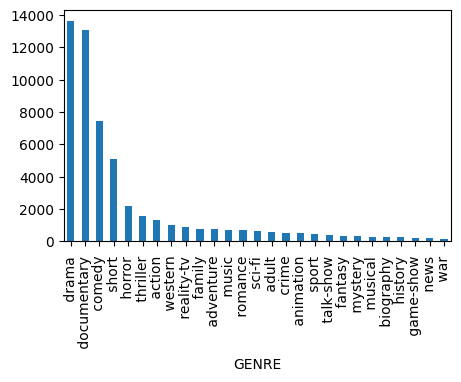

In [16]:
data_frame_train["GENRE"].value_counts().plot(kind="bar",figsize=(5,3))

In [17]:
#importing Test Data
data_frame_test=pd.read_csv('test_data.txt',sep=':::',names=['ID','TITLE','DESCRIPTION'], engine='python')

In [18]:
data_frame_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [19]:
data_frame_test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [20]:
# To remove stopwords like 'the','and','is' etc from text
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS= set(stopwords.words("english"))  # Stopwords set

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
# to return the base or dictionary form of a word
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
# Define function for cleaning data
from nltk.tokenize import word_tokenize
import re # For replacing any text if required

def Pre_process_text(act_string):
    # remove all values other than alphabets
    act_string= re.sub(r'[^a-zA-Z+]'," ", act_string)
    act_string = act_string.lower() # lowercasing text
    Token_words = word_tokenize(act_string) # to tokenize strings into words
    #Remove stop words and to return base form of a word
    new_string = [wordnet.lemmatize(word) for word in Token_words if not word in STOP_WORDS] # removing stopwords
    new_string = ' '.join(new_string)
    return new_string

In [23]:
# Clean data in description column of Train data using function
data_frame_train['DESCRIPTION_cleaned'] = data_frame_train['DESCRIPTION'].apply(Pre_process_text)
data_frame_train.head()

,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_cleaned
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent year old ...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers un recovered body ground zer...


In [24]:
# Clean data in description column of Test data using function
data_frame_test['DESCRIPTION_cleaned_test'] = data_frame_test['DESCRIPTION'].apply(Pre_process_text)
data_frame_test.head()

,ID,TITLE,DESCRIPTION,DESCRIPTION_cleaned_test
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apartment job especial...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...


#### Apply TF-ID (Term Frequency-Inverse Document Frequency)

In [25]:
# TF-ID(Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid = TfidfVectorizer()
X_train_Tfid = Tfid .fit_transform(data_frame_train["DESCRIPTION_cleaned"])
X_Test =Tfid.transform(data_frame_test["DESCRIPTION_cleaned_test"])

#### Splitting Data For Training and Testing

In [26]:
#First step in building the model is to identify the Feature(Input) variables and Target (Output) variable
features = X_train_Tfid
target = data_frame_train["GENRE"]

In [27]:
from sklearn.model_selection import train_test_split
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)

### Logistic Regression Model

In [28]:
# Learn the Logistic Regression Model on train data
from sklearn.linear_model import LogisticRegression
my_model_LR=LogisticRegression()

In [29]:
# Fitting the model in train data set ie the  Logistic Regression Model should learn from the Train Data
my_model_LR=my_model_LR.fit(X_train, y_train)

In [30]:
# Predicting Genre from Feature Test values
y_pred_LR = my_model_LR.predict(X_test)
y_pred_LR

array([' documentary ', ' documentary ', ' documentary ', ...,
       ' documentary ', ' drama ', ' sci-fi '], dtype=object)


#### Testing the Logistic Regression Model

In [31]:
from sklearn.metrics import accuracy_score, classification_report
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred_LR)

0.5812044637093056

In [32]:
# Classification Report
print(classification_report(y_pred_LR,y_test))

               precision    recall  f1-score   support

      action        0.24      0.55      0.33       119
       adult        0.20      0.61      0.30        36
   adventure        0.12      0.67      0.20        30
   animation        0.03      0.60      0.06         5
   biography        0.00      0.00      0.00         0
      comedy        0.59      0.52      0.56      1595
       crime        0.02      0.17      0.03        12
 documentary        0.86      0.66      0.74      3465
       drama        0.79      0.53      0.64      4080
      family        0.07      0.61      0.12        18
     fantasy        0.00      0.00      0.00         0
   game-show        0.42      0.77      0.54        26
     history        0.00      0.00      0.00         0
      horror        0.52      0.67      0.58       332
       music        0.39      0.65      0.49        86
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

###  Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import MultinomialNB
# Learn the Multinomial Naive Bayes Model on train data
my_model_NB= MultinomialNB()

In [34]:
# Fitting the model in train data set ie the Naive Bayes Classifier should learn from the Train Data
my_model_NB=my_model_NB.fit(X_train, y_train)

In [35]:
# Predicting Genre from Feature Test values
y_pred_NB = my_model_NB.predict(X_test)
y_pred_NB

array([' documentary ', ' documentary ', ' documentary ', ...,
       ' documentary ', ' drama ', ' documentary '], dtype='<U13')

#### Testing the Naive Bayes Classifier

In [36]:
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred_NB)

0.44507977497002676

In [37]:
# Classification Report
print(classification_report(y_pred_NB,y_test))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.04      0.55      0.08       108
       crime        0.00      0.00      0.00         0
 documentary        0.89      0.53      0.67      4474
       drama        0.86      0.38      0.53      6260
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

### Support Vector Machine Classifier Model

In [38]:
from sklearn.svm import SVC
my_model_SVC= SVC(gamma='auto')

In [39]:
# Fitting the model in train data set ie SVC Model should learn from the on Train Data
my_model_SVC.fit(X_train, y_train)

SVC(gamma='auto')

#### Predicting using SVC

In [40]:
y_pred_SVC = my_model_SVC.predict(X_test)
y_pred_SVC

array([' drama ', ' drama ', ' drama ', ..., ' drama ', ' drama ',
       ' drama '], dtype=object)

#### Testing the SVC Model

In [41]:
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred_SVC)

0.254173199299087

In [42]:
# Classification Report
print(classification_report(y_pred_SVC,y_test))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.00      0.00      0.00         0
       crime        0.00      0.00      0.00         0
 documentary        0.00      0.00      0.00         0
       drama        1.00      0.25      0.41     10843
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

#### Make Predictions on Actual Test Data

In [43]:
Genre_Predicted_Test_data= my_model_LR.predict(X_Test)
data_frame_test['Genre_Predicted'] = Genre_Predicted_Test_data
data_frame_test.head()

,ID,TITLE,DESCRIPTION,DESCRIPTION_cleaned_test,Genre_Predicted
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apartment job especial...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...,drama
